In [1]:
import math
from jvnpy import Game, State
from jvnpy import agents

Define the agents, we are using the default agents in this case

In [2]:
player = agents.ProbabilityTitForTatAgent(p=0.08)
opponent = agents.RandomAgent()


Make a sampel game and run in 100 times, after that show the sum and graph of each player

In [3]:
sample_game = Game(player, opponent, state=State()).play_n_rounds(100)

In [4]:
sum(sample_game.player_scores), sum(sample_game.opponent_scores)

(212, 212)

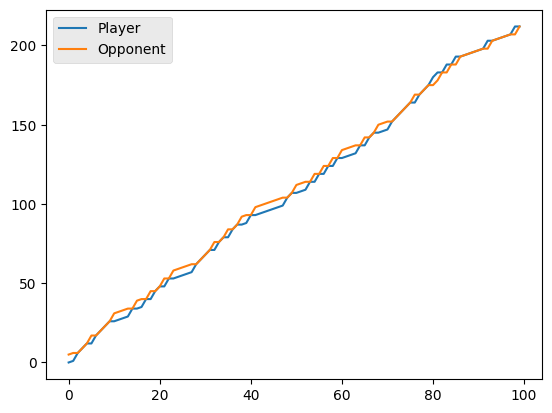

In [5]:
sample_game.plot_results()

Definind a custom agent and playing agains the opponent

In [6]:
class SomeCustomAgent(agents.Agent):
    def act(self, state, role: str):
        if len(state.opponent_decisions) < 10:
            return 1
        elif role == "player":
            if math.floor(sum(state.opponent_decisions[-10:])) == 1:
                return 1
            else:
                return 0
        elif role == "opponent":
            if math.floor(sum(state.player_decisions[-10:])) == 1:
                return 1
            else:
                return 0

In [7]:
player_2 = SomeCustomAgent()

In [8]:
sample_game_2 = Game(player_2, opponent, state=State()).play_n_rounds(100)

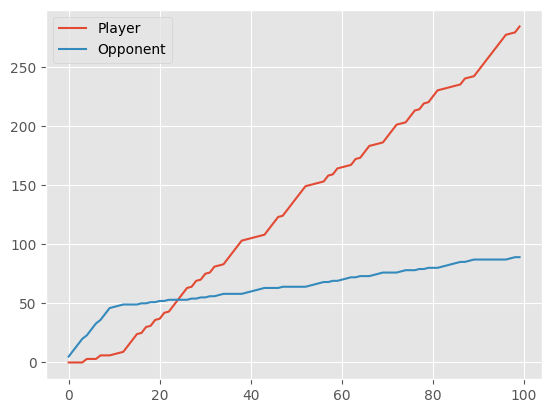

In [9]:
sample_game_2.plot_results()